In [1]:
import pymc as pm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Impostazione del seme per la riproducibilità
np.random.seed(84735)

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
brain_data = pd.read_csv("../data/brain_data.csv")
brain_data.head()

,ID,GENDER,FSIQ,VIQ,PIQ,MRI,IQDI
0,2,Male,140,150,124,1001121,Higher IQ
1,3,Male,139,123,150,1038437,Higher IQ
2,4,Male,133,129,128,965353,Higher IQ
3,9,Male,89,93,84,904858,Lower IQ
4,10,Male,133,114,147,955466,Higher IQ


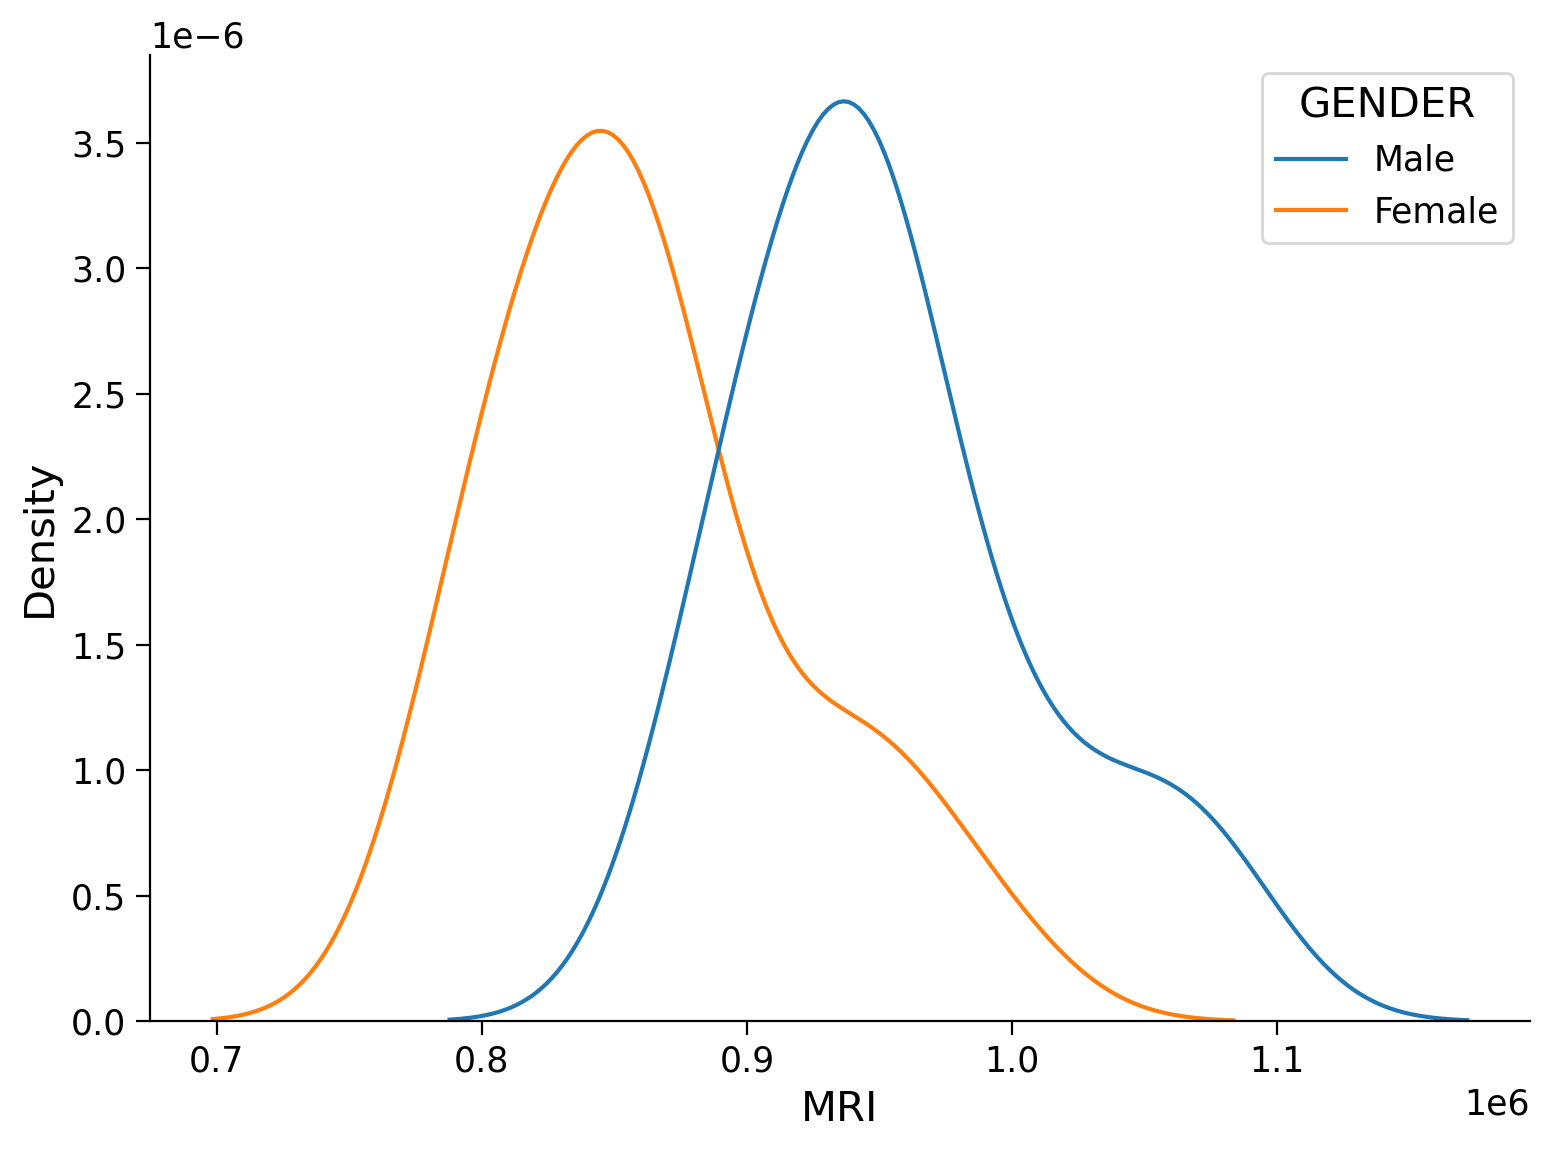

In [4]:
sns.kdeplot(data=brain_data, x="MRI", hue="GENDER");

In [5]:
brain_data['mri'] = (brain_data['MRI'] - brain_data['MRI'].mean()) / brain_data['MRI'].std()
brain_data['gender'] = (brain_data['GENDER'] == 'Male').astype(int)

In [6]:
data_list = {
    'N': len(brain_data['mri']),
    'x': brain_data['gender'].values,
    'y': brain_data['mri'].values
}

df = pd.DataFrame(data_list)
df.head()

,N,x,y
0,40,1,1.277855
1,40,1,1.794111
2,40,1,0.783016
3,40,1,-0.053914
4,40,1,0.646232


In [7]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', 0, 2.5)
    beta = pm.Normal('beta', 0, 2.5)
    sigma = pm.HalfNormal('sigma', 10)
    mu = alpha + beta * df['x']
    y_obs = pm.Normal('y_obs', mu, sigma, observed=df['y'])

In [8]:
with model:
    idata = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [9]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.62,0.18,-0.95,-0.26,0.00,0.0,2234.17,2412.11,1.0
beta,1.25,0.25,0.75,1.70,0.01,0.0,2338.75,2581.35,1.0
sigma,0.80,0.10,0.62,0.97,0.00,0.0,2352.66,2221.00,1.0


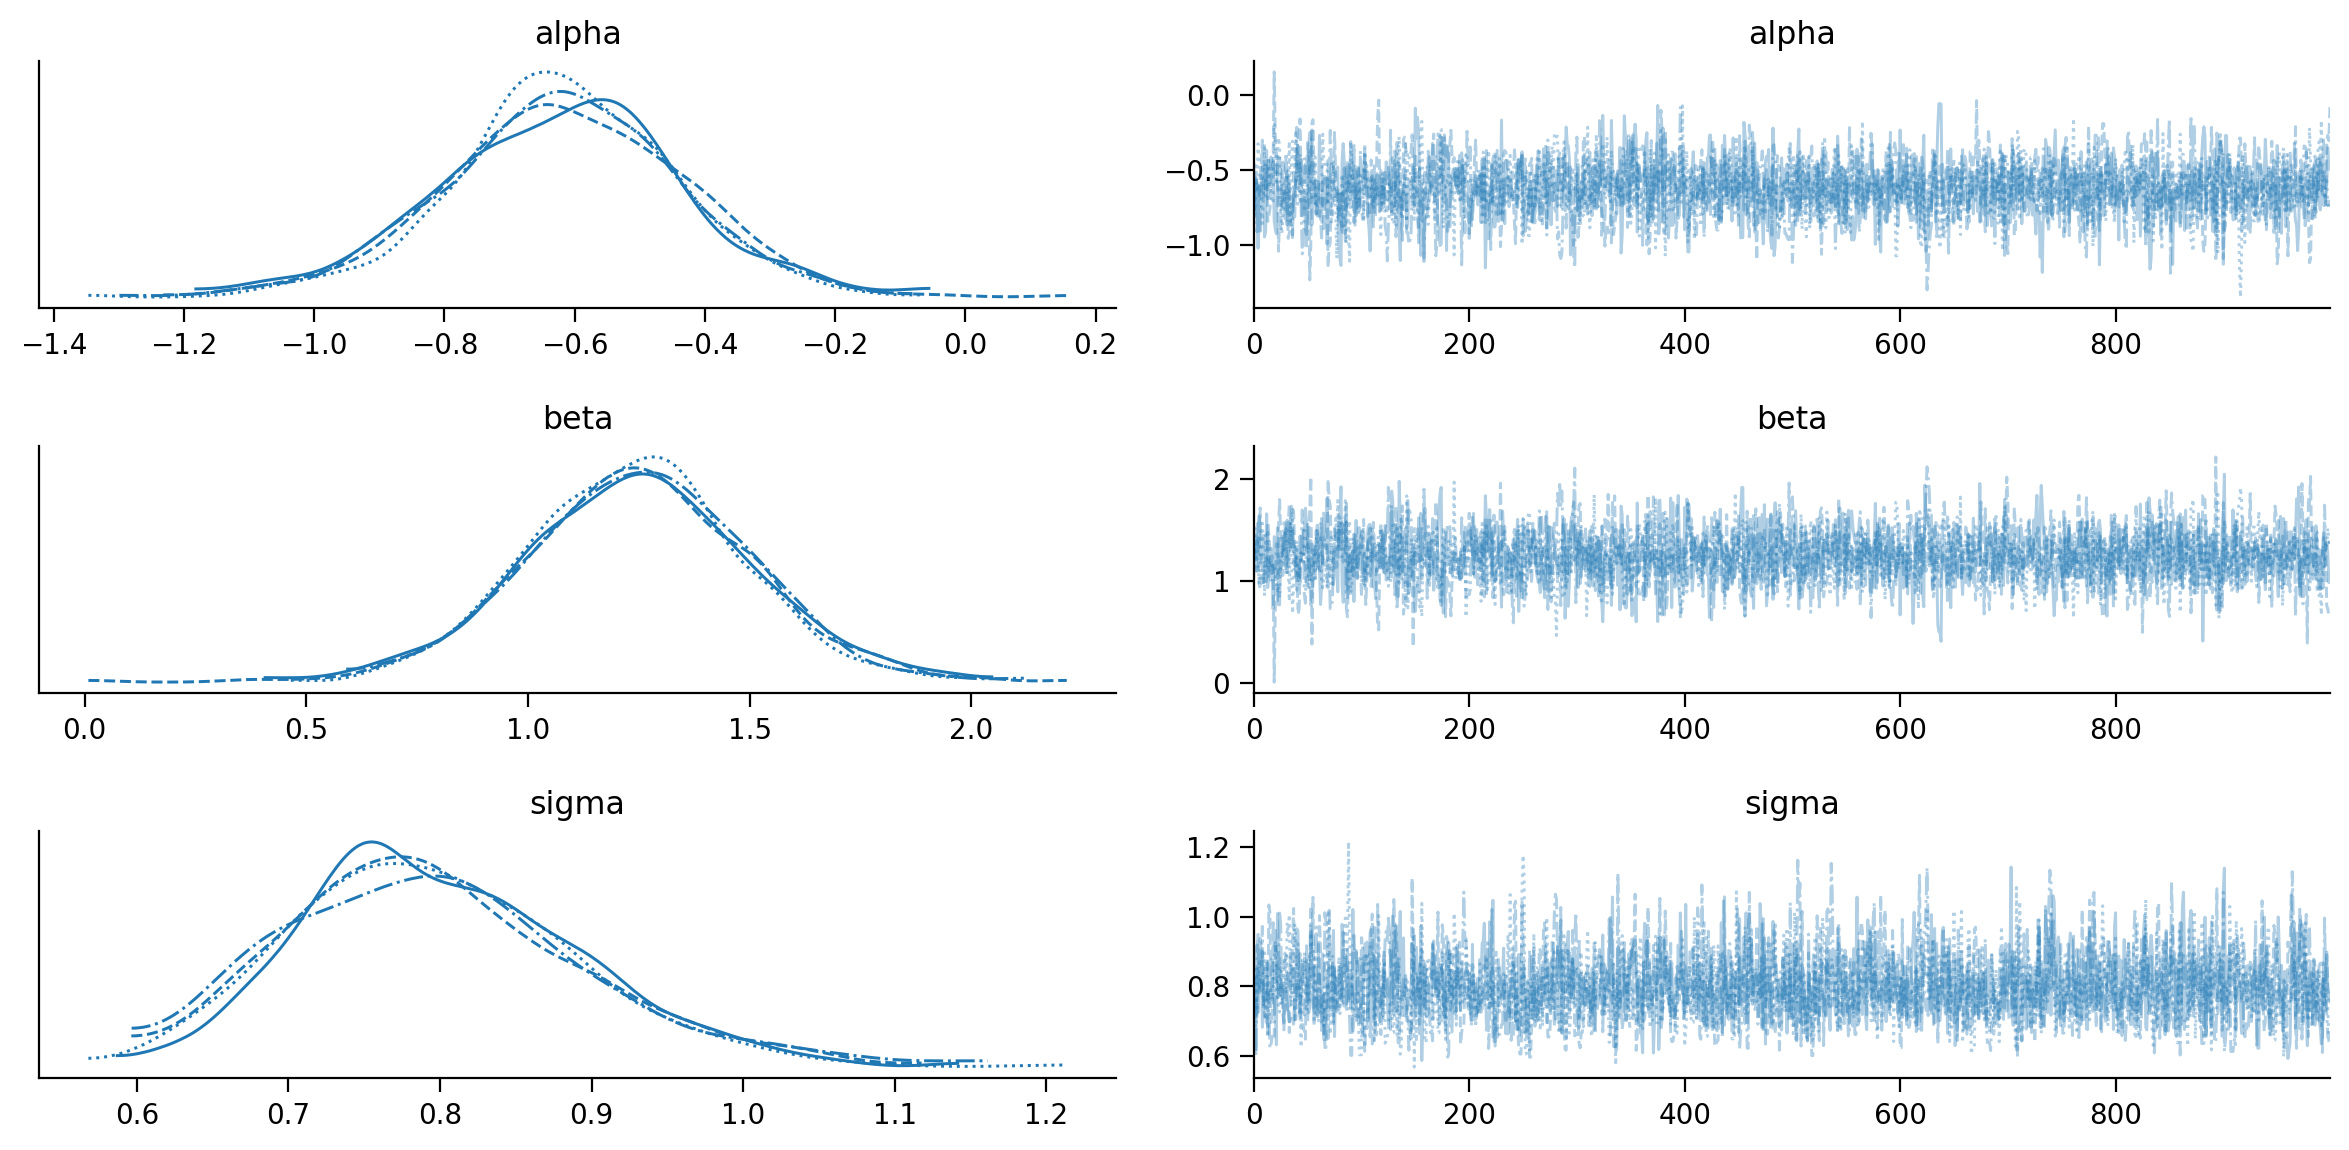

In [10]:
# Diagnostica
az.plot_trace(idata);

In [11]:
az.hdi(idata, hdi_prob=0.95)

<xarray.Dataset> Size: 96B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    alpha    (hdi) float64 16B -0.9685 -0.2548
    beta     (hdi) float64 16B 0.7093 1.702
    sigma    (hdi) float64 16B 0.6212 0.9868

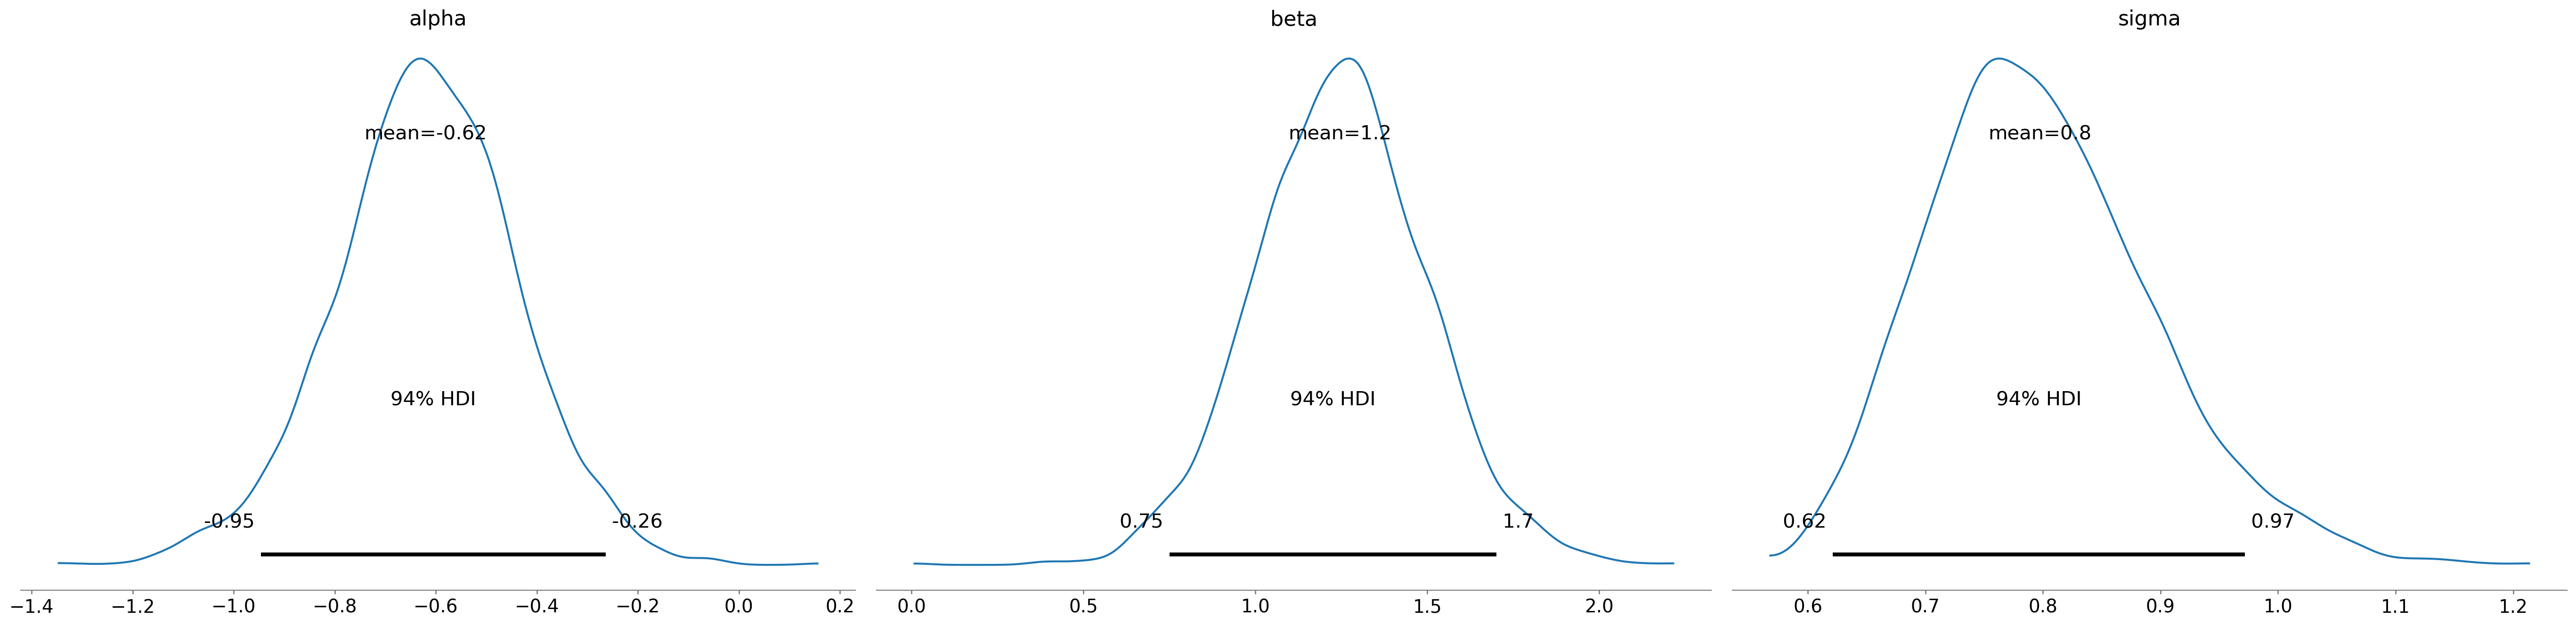

In [12]:
az.plot_posterior(idata, round_to=2);

In [13]:
data_list2 = {
    'N': len(brain_data['gender']),
    'x': brain_data['gender'].values,
    'y': (brain_data['FSIQ'] - brain_data['FSIQ'].mean()) / brain_data['FSIQ'].std()
}

df2 = pd.DataFrame(data_list2)
df2.head()

,N,x,y
0,40,1,1.102480
1,40,1,1.060955
2,40,1,0.811807
3,40,1,-1.015278
4,40,1,0.811807


In [14]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', 0, 2.5)
    beta = pm.Normal('beta', 0, 2.5)
    sigma = pm.HalfNormal('sigma', 10)
    mu = alpha + beta * df2['x']
    y_obs = pm.Normal('y_obs', mu, sigma, observed=df2['y'])

In [15]:
with model:
    idata2 = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


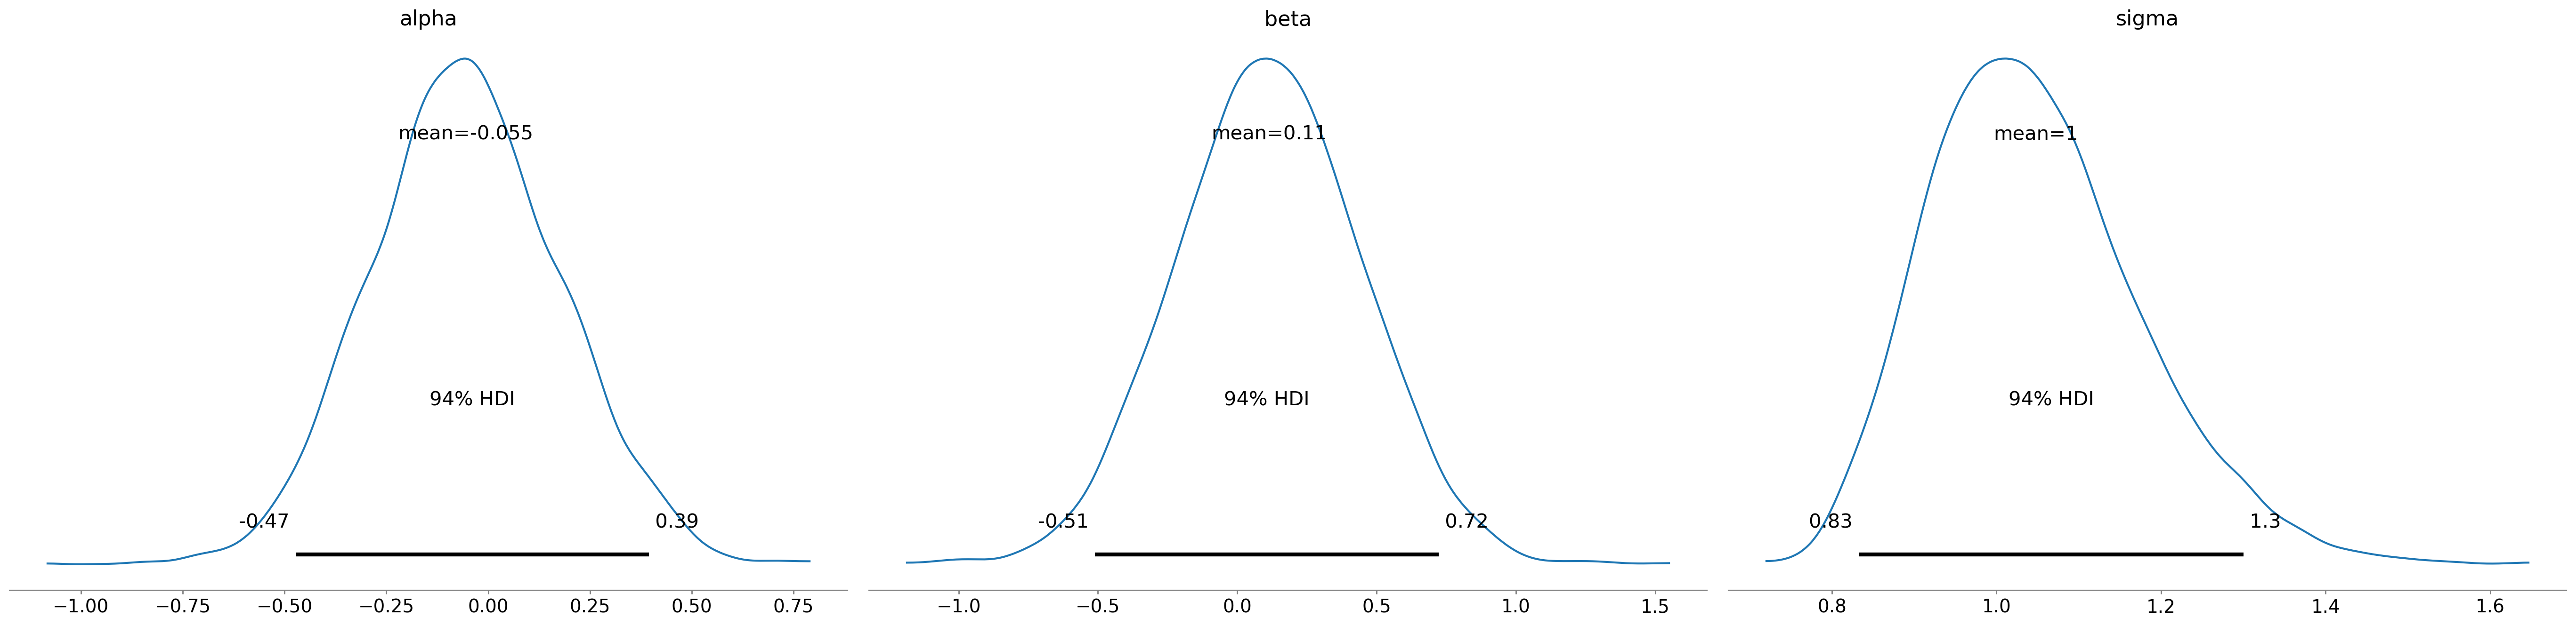

In [16]:
# Grafico della distribuzione a posteriori dei parametri
az.plot_posterior(idata2, round_to=2);

In [17]:
az.summary(idata2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.06,0.23,-0.47,0.39,0.00,0.00,2201.67,2625.18,1.0
beta,0.11,0.34,-0.51,0.72,0.01,0.01,2089.62,2367.39,1.0
sigma,1.05,0.13,0.83,1.30,0.00,0.00,2600.85,2275.11,1.0
